In [44]:
import torch
from src.backbone.ntv2 import NTv2Embedder
from src.model.simclr import SimCLRModule
from lightly import loss

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SimCLR model

In [45]:
backbone = NTv2Embedder(model_name = "InstaDeepAI/nucleotide-transformer-v2-50m-multi-species",bp_per_token = 6)

# Build the SimCLR model.
model = SimCLRModule(backbone)


# Dummy dataset

In [46]:
from src.datasets.base import NucleotideSequencePairDataset
from transformers import AutoTokenizer

In [47]:
import random
import numpy as np

# Define nucleotides and sequence length
nucleotides = ['A', 'T', 'G', 'C']
sequence_length = 1000
num_pairs = 100

# Function to generate a random nucleotide sequence
def generate_nucleotide_sequence(length):
    return ''.join(np.random.choice(nucleotides) for _ in range(length))

# Generate two numpy arrays of 100 sequences each
sequences_1 = np.array([generate_nucleotide_sequence(sequence_length) for _ in range(num_pairs)])
sequences_2 = np.array([generate_nucleotide_sequence(sequence_length) for _ in range(num_pairs)])

tokenizer = AutoTokenizer.from_pretrained("InstaDeepAI/nucleotide-transformer-v2-50m-multi-species")

train_dataset = NucleotideSequencePairDataset(sequences_1, sequences_2,tokenizer = tokenizer)

In [50]:
test_dl  = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=10,  
    shuffle=True,  
)


for view0,vew1 in test_dl:
    print(view0.shape)
    print(vew1.shape)
    break

torch.Size([10, 171])
torch.Size([10, 171])


# Train Loop

## NTXEntLoss

Epoch [1/10], Loss: 3.13501
Epoch [2/10], Loss: 3.11960
Epoch [3/10], Loss: 3.06682
Epoch [4/10], Loss: 2.60402
Epoch [5/10], Loss: 2.28040
Epoch [6/10], Loss: 1.91254
Epoch [7/10], Loss: 1.68515
Epoch [8/10], Loss: 1.50696
Epoch [9/10], Loss: 1.34269
Epoch [10/10], Loss: 1.27933


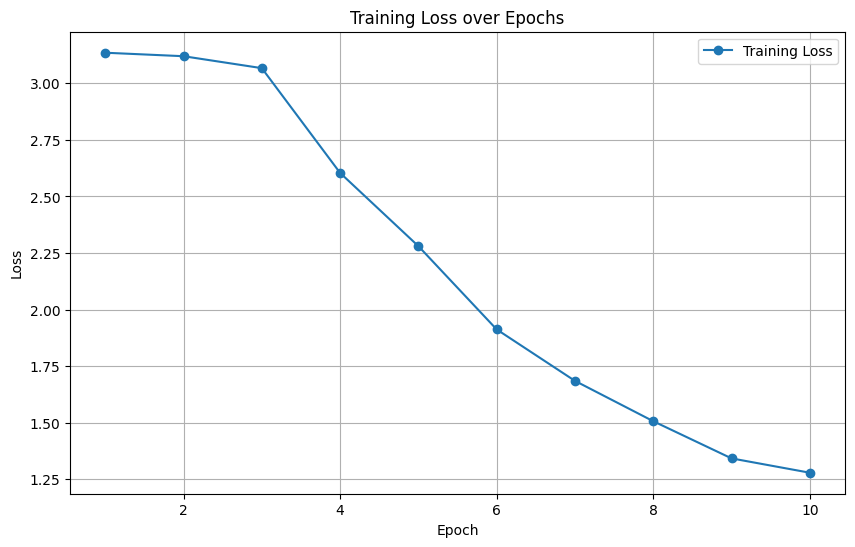

In [45]:
import matplotlib.pyplot as plt

# Store training loss values
training_loss = []

# Move the model to GPU
model = model.cuda()

# Build a PyTorch dataloader
dataloader = torch.utils.data.DataLoader(
    train_dataset,  # Pass the dataset to the dataloader.
    batch_size=10,  # A large batch size helps with the learning.
    shuffle=True,  # Shuffling is important!
)

# Lightly exposes building blocks such as loss functions.
criterion = loss.NTXentLoss(temperature=0.5)

# Get a PyTorch optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-6)

# Train the model and track loss
for epoch in range(10):
    epoch_loss = 0.0  # Accumulate loss per epoch
    for view0, view1 in dataloader:
        # Move input views to GPU
        view0 = view0.cuda()
        view1 = view1.cuda()
        
        # Forward pass
        z0 = model(view0)
        z1 = model(view1)

        # Calculate loss
        loss = criterion(z0, z1)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # Accumulate the loss for each batch
        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_epoch_loss = epoch_loss / len(dataloader)
    training_loss.append(avg_epoch_loss)
    print(f"Epoch [{epoch+1}/10], Loss: {avg_epoch_loss:.5f}")

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), training_loss, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## DCL Loss

Epoch [1/10], Loss: 4.43705
Epoch [2/10], Loss: 4.51976
Epoch [3/10], Loss: 4.67152
Epoch [4/10], Loss: 4.48463
Epoch [5/10], Loss: 3.87809
Epoch [6/10], Loss: 3.34441
Epoch [7/10], Loss: 2.95674
Epoch [8/10], Loss: 2.74798
Epoch [9/10], Loss: 2.56940
Epoch [10/10], Loss: 2.44108


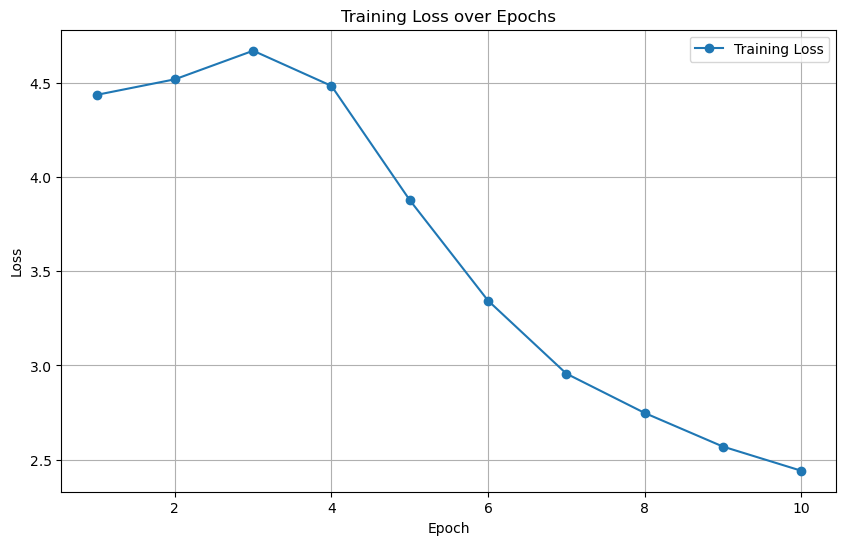

In [51]:
import matplotlib.pyplot as plt

# Store training loss values
training_loss = []

# Move the model to GPU
model = model.cuda()

# Build a PyTorch dataloader
dataloader = torch.utils.data.DataLoader(
    train_dataset,  # Pass the dataset to the dataloader.
    batch_size=10,  # A large batch size helps with the learning.
    shuffle=True,  # Shuffling is important!
)

# Lightly exposes building blocks such as loss functions.
criterion = loss.DCLLoss(temperature=0.5)

# Get a PyTorch optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-6)

# Train the model and track loss
for epoch in range(10):
    epoch_loss = 0.0  # Accumulate loss per epoch
    for view0, view1 in dataloader:
        # Move input views to GPU
        view0 = view0.cuda()
        view1 = view1.cuda()
        
        # Forward pass
        z0 = model(view0)
        z1 = model(view1)

        # Calculate loss
        loss = criterion(z0, z1)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # Accumulate the loss for each batch
        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_epoch_loss = epoch_loss / len(dataloader)
    training_loss.append(avg_epoch_loss)
    print(f"Epoch [{epoch+1}/10], Loss: {avg_epoch_loss:.5f}")

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), training_loss, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
